# **BIG MART SALES PREDICTION**

*# Predict the sales per product for a given product and store*

*# The data is from the big mart*

*# Target label : Item_Outlet_Sales*

*# Its a regression probelm*

In [1]:
# IMPORT THE LIBRARIES 

In [2]:
from pyforest import*
lazy_imports()

['from sklearn.impute import SimpleImputer',
 'from sklearn.ensemble import RandomForestRegressor',
 'import cv2',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import numpy as np',
 'from sklearn.model_selection import StratifiedKFold',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import imutils',
 'import plotly.graph_objs as go',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from sklearn.linear_model import ElasticNetCV',
 'import torch',
 'import sklearn',
 'import fastai',
 'import pydot',
 'import bokeh',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.manifold import TSNE',
 'from sklearn.linear_model import Ridge',
 'import matplotlib.pyplot as plt',
 'import xgboost as xgb',
 'import os',
 'import keras',
 'from sklearn.preprocessing import RobustScaler',
 'from xlrd import open_workbook',
 'import pandas as pd',
 'import

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
print("The size of training data",train_data.shape)
print("The shape of testing data",test_data.shape)

The size of training data (8523, 12)
The shape of testing data (5681, 11)


In [8]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [9]:
# We can see that there are missing item_weight 

In [10]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
train_data['source'] = 'train'
test_data['source'] = 'test'
df = pd.concat([train_data,test_data],ignore_index = True)

<IPython.core.display.Javascript object>

In [13]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [14]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [15]:
df.shape

(14204, 13)

In [16]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

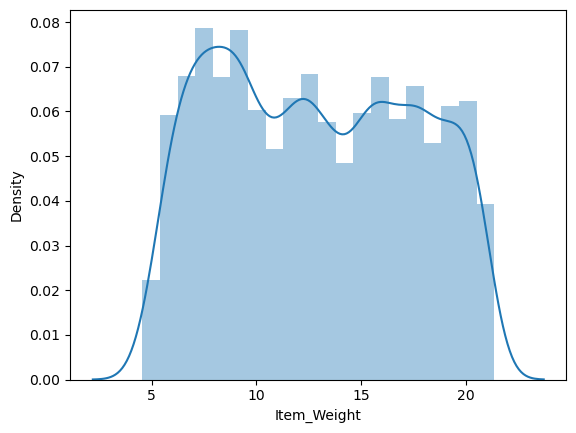

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

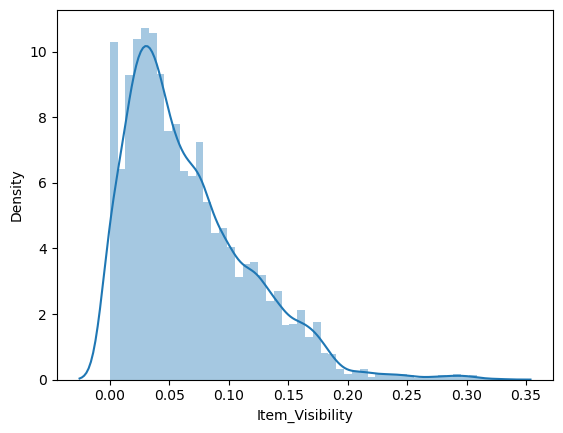

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

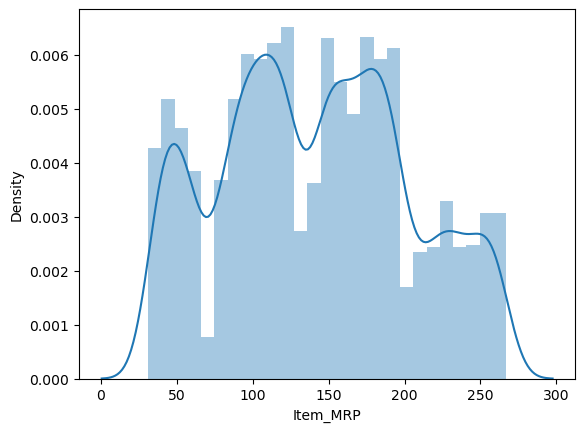

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

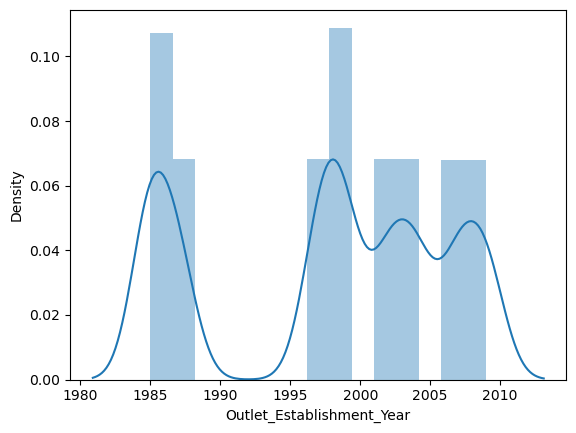

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

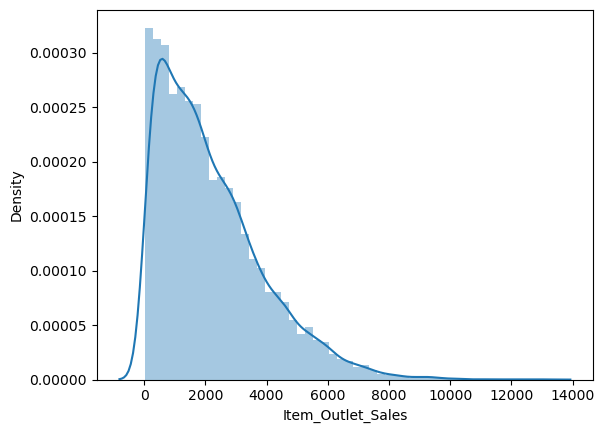

In [17]:
for i in train_data.describe().columns:
    sns.distplot(train_data[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

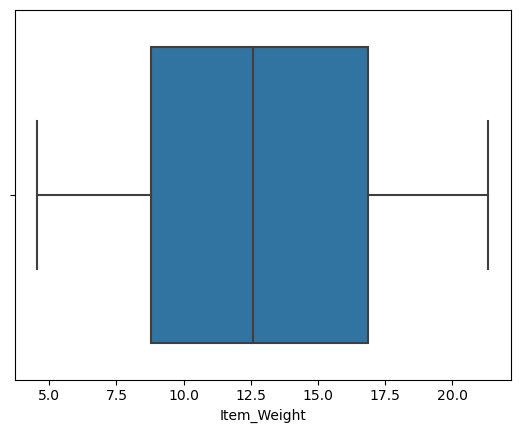

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

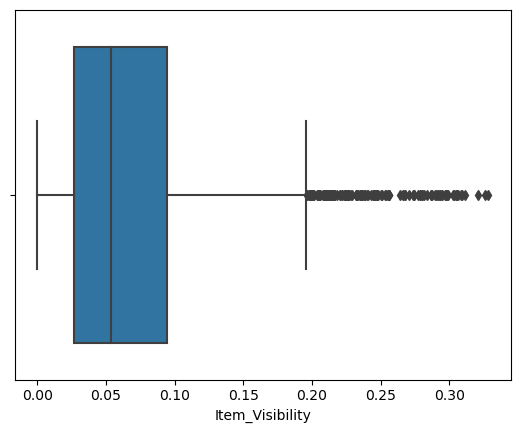

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

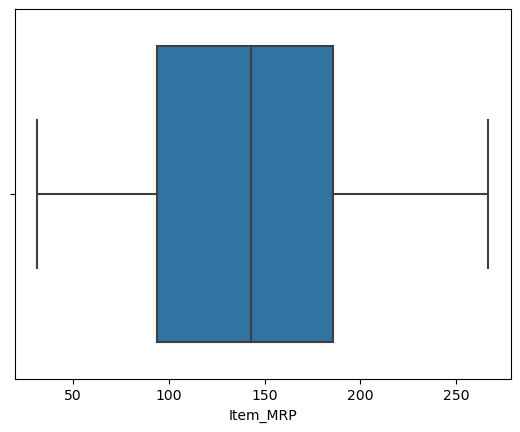

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

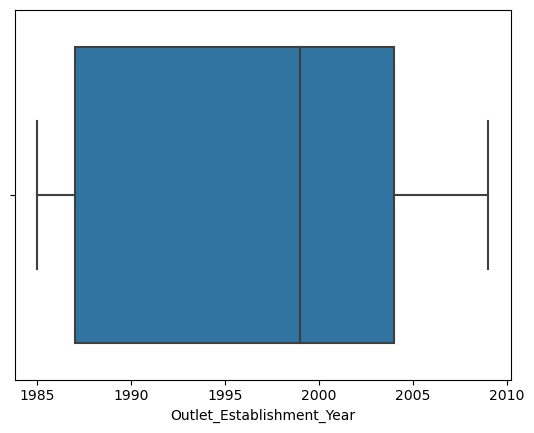

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

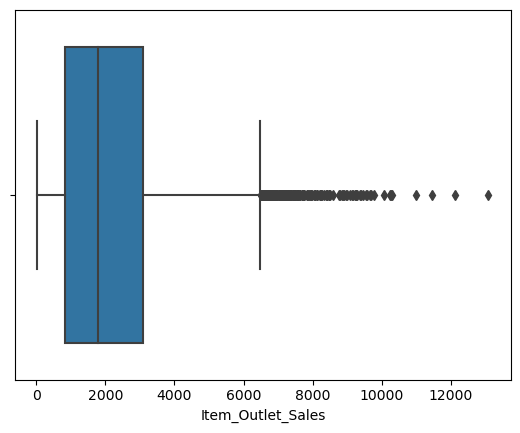

In [18]:
for i in train_data.describe().columns:
    sns.boxplot(train_data[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

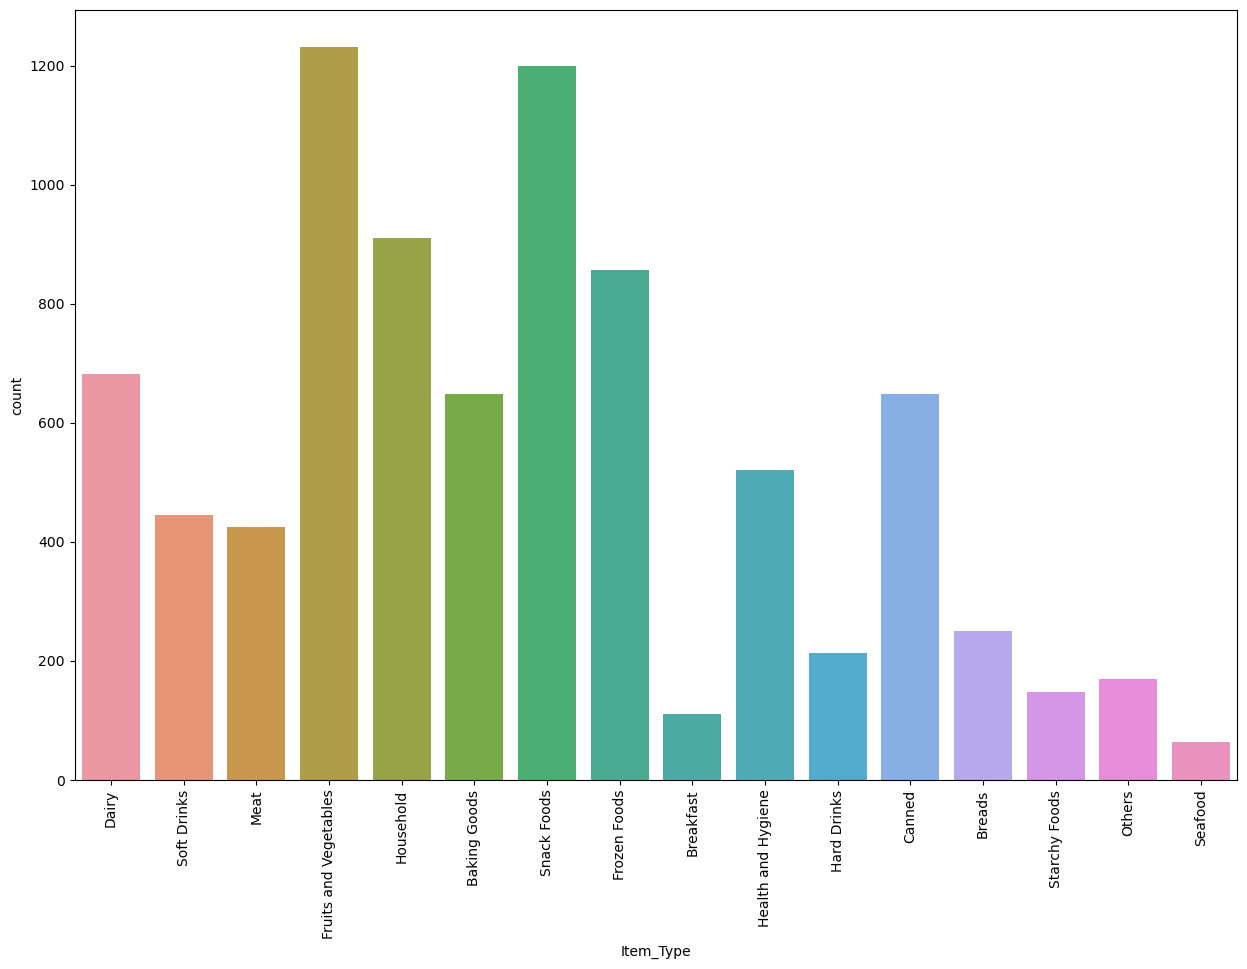

In [19]:
plt.figure(figsize = (15,10))
sns.countplot(train_data.Item_Type)
plt.xticks(rotation=90)
plt.show()

In [20]:
train_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

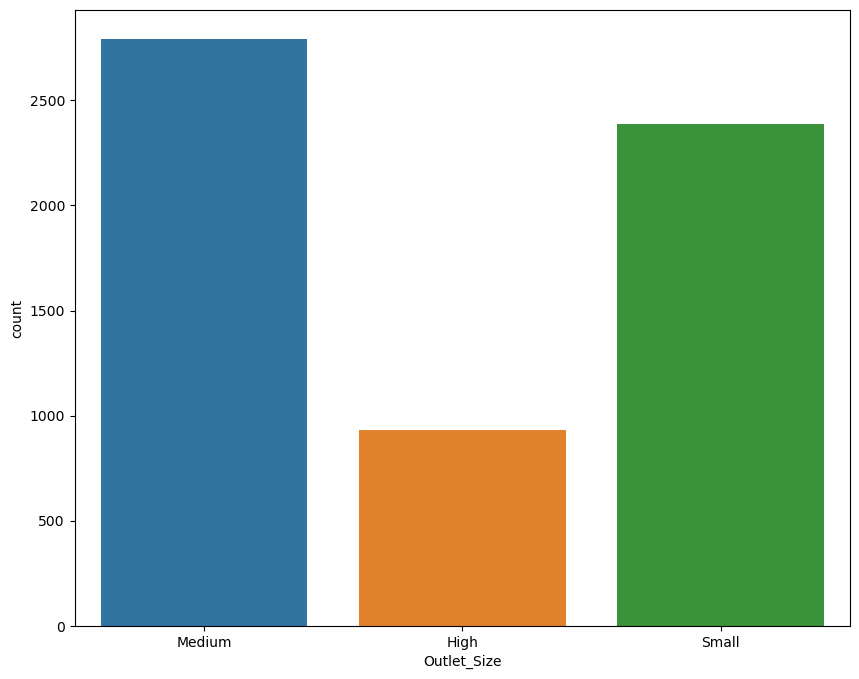

In [21]:
plt.figure(figsize = (10,8))
sns.countplot(train_data.Outlet_Size)

In [22]:
train_data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

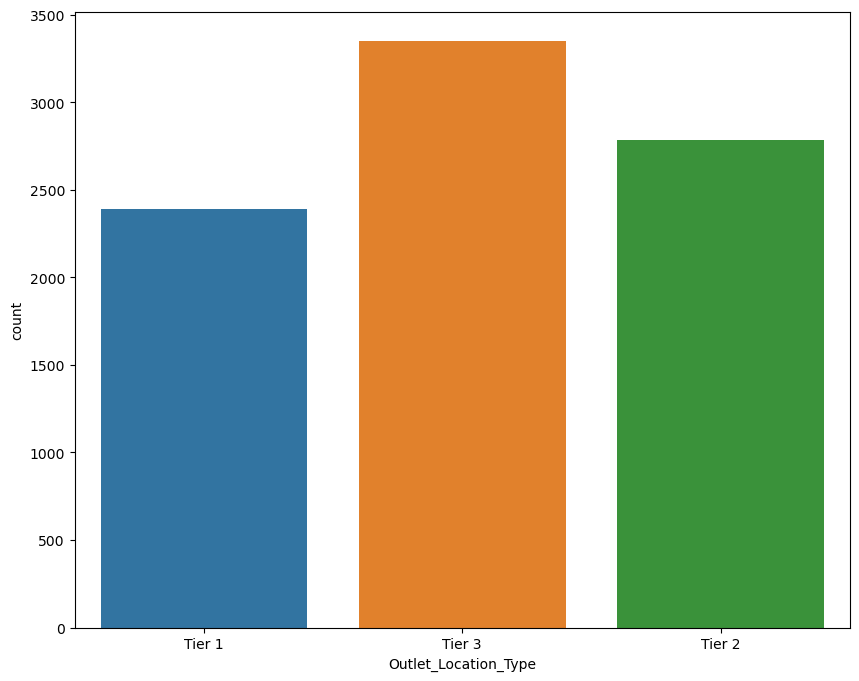

In [23]:
plt.figure(figsize = (10,8))
sns.countplot(train_data.Outlet_Location_Type)

In [24]:
train_data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

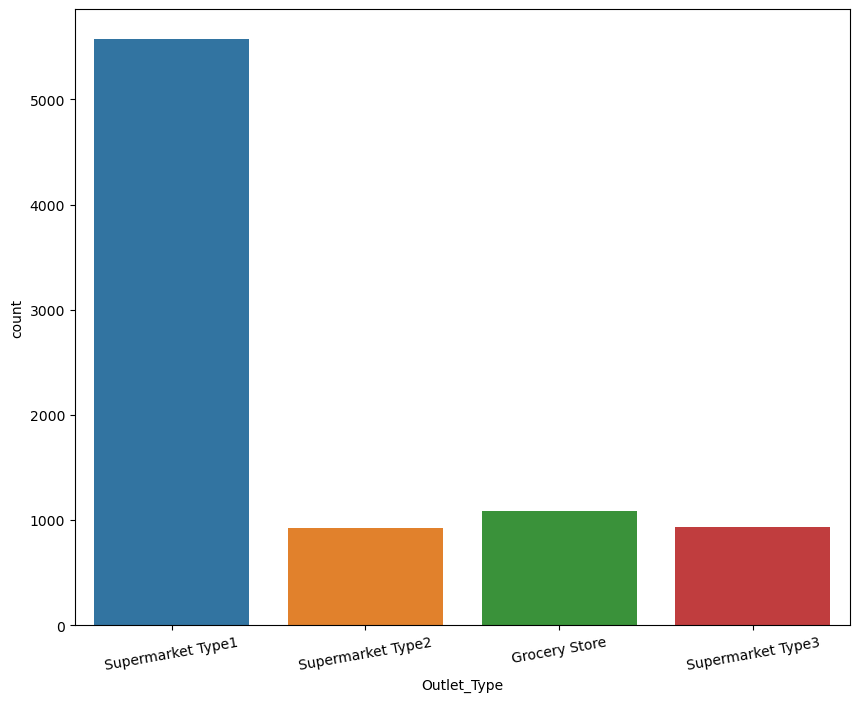

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(train_data.Outlet_Type)
plt.xticks(rotation=10)

In [26]:
train_data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Item Weights Vs Outlet Sales'}, xlabel='Item Weight', ylabel='Item Outlet sales'>

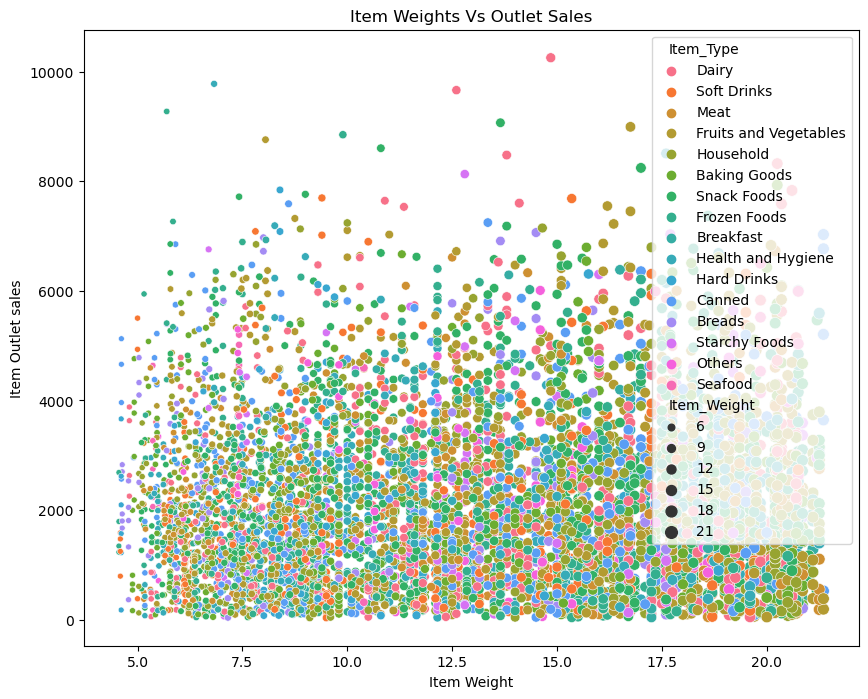

In [27]:
plt.figure(figsize=(10,8))
plt.xlabel("Item Weight")
plt.ylabel("Item Outlet sales")
plt.title("Item Weights Vs Outlet Sales")
sns.scatterplot(x="Item_Weight",y="Item_Outlet_Sales",hue="Item_Type",size="Item_Weight",data=train_data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

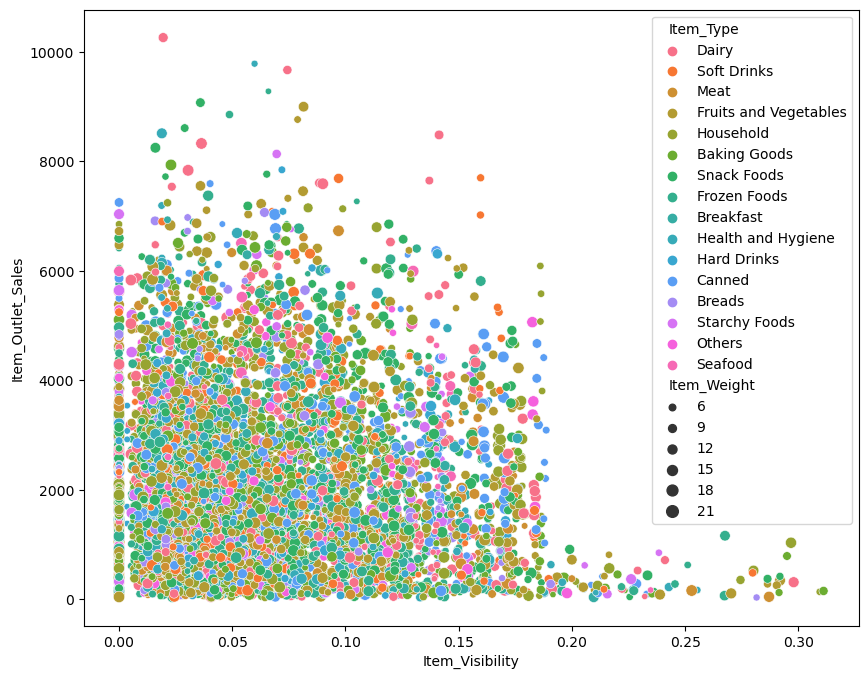

In [28]:
plt.figure(figsize = (10,8))
plt.xlabel = "Item Visibility"
plt.ylabel = "Item Outlet Sales"
plt.title = "Item Visibility Vs Item Outlet Sales"
sns.scatterplot(x = "Item_Visibility",y="Item_Outlet_Sales",hue="Item_Type",size = "Item_Weight",data=train_data)

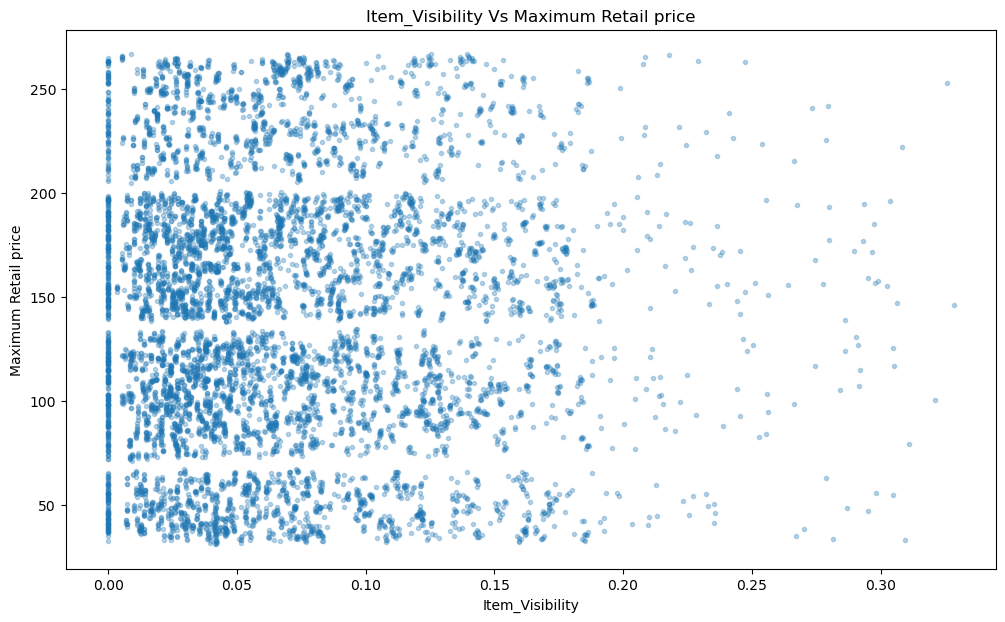

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel ("Maximum Retail price")
plt.title ("Item_Visibility Vs Maximum Retail price")
plt.plot(train_data.Item_Visibility,train_data.Item_MRP,".",alpha = 0.3)
plt.show()

<IPython.core.display.Javascript object>

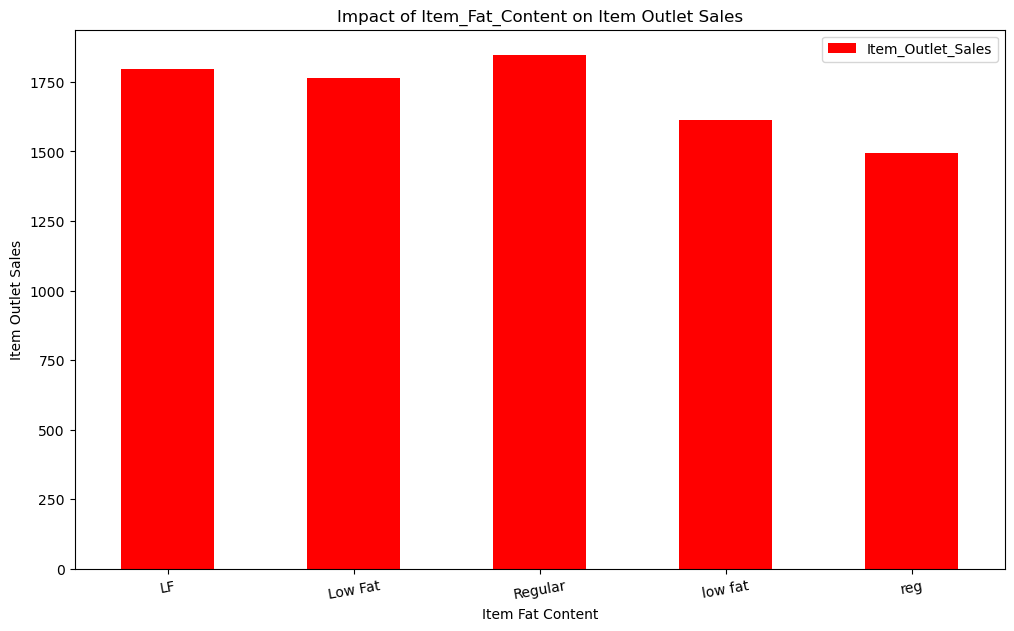

In [30]:
item_Fat_Content_pivot = \
train_data.pivot_table(index="Item_Fat_Content",values="Item_Outlet_Sales",aggfunc=np.median)

item_Fat_Content_pivot.plot(kind = 'bar',color='red',figsize=(12,7))
plt.xlabel("Item Fat Content")
plt.ylabel("Item Outlet Sales")
plt.title("Impact of Item_Fat_Content on Item Outlet Sales")
plt.xticks(rotation=10)
plt.show()

In [31]:
df["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [32]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [33]:
df["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

<IPython.core.display.Javascript object>

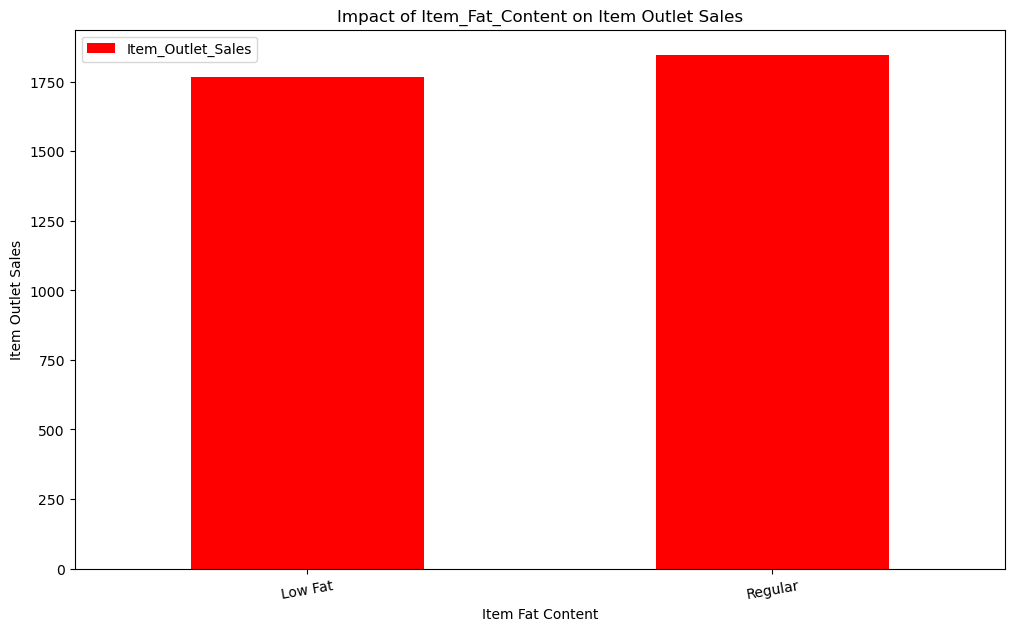

In [34]:
item_Fat_Content_pivot = \
df.pivot_table(index="Item_Fat_Content",values="Item_Outlet_Sales",aggfunc=np.median)

item_Fat_Content_pivot.plot(kind = 'bar',color='red',figsize=(12,7))
plt.xlabel("Item Fat Content")
plt.ylabel("Item Outlet Sales")
plt.title("Impact of Item_Fat_Content on Item Outlet Sales")
plt.xticks(rotation=10)
plt.show()

In [35]:
corr = train_data.corr()

<IPython.core.display.Javascript object>

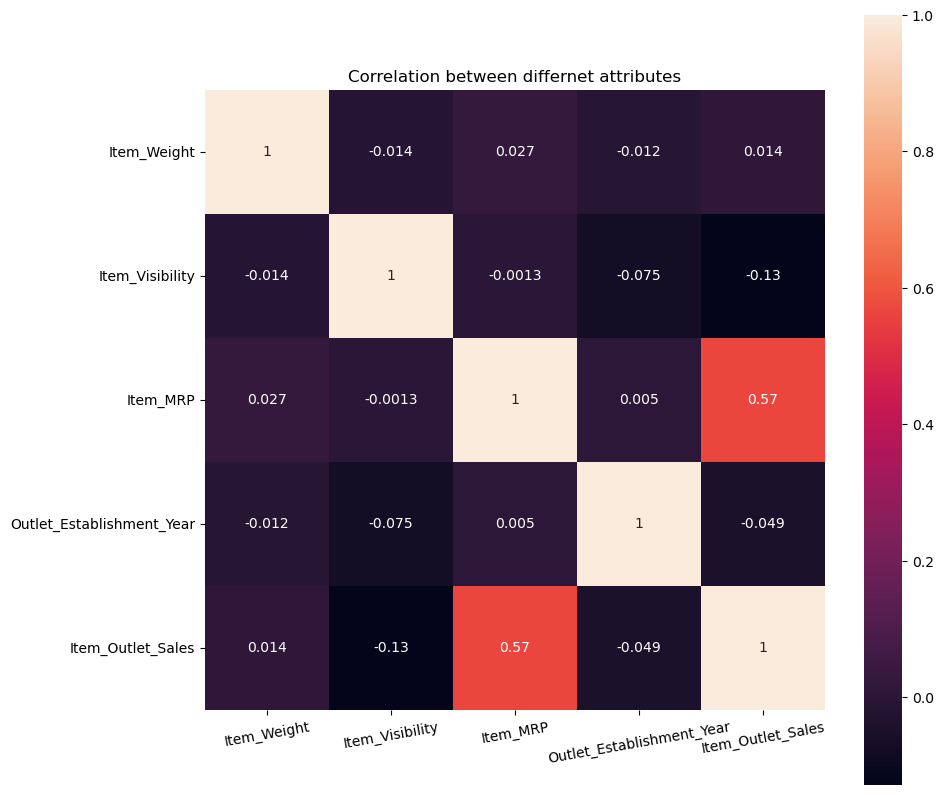

In [39]:
plt.figure(figsize = (10,10))
sns.heatmap(corr , vmax = 1 , square=True,annot=True)
plt.title("Correlation between differnet attributes")
plt.xticks(rotation=10)
plt.show()